In [1]:
# importing the initial libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the data from the train set

data = pd.read_csv('C:\\Users\\DELL\\Kaggle\\Challenges\\titanic\\train.csv')

In [3]:
# visualising the main data

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
# Variable - Definition -  Key
# survival: Survival: 0 = No, 1 = Yes
# pclass: Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd
# sex: Sex: male, female
# Age: Age in years
# sibsp: # of siblings / spouses aboard the Titanic
# parch: # of parents / children aboard the Titanic	
# ticket: Ticket number
# fare: Passenger fare
# cabin: Cabin number
# embarked: Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton

In [6]:
# EXPLORING THE DATA

# 1. Metadata - Dtypes
# 2. Descriptive Statistics - describe
# 3. Frequencys - value_counts()
# 4. Correlation between integer variables - correlation matrix
# 5. Data Balance
# 6. Check for Nulls

In [7]:
# 1. Metadata - Dtypes

data.dtypes

# ID: PassengerID
# TARGET: Survided
# NUMERICAL: Age, SibSp, Parch, Fare
# CATEGORICAL: Pclass, Sex, Cabin, Embarked

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
# 2. Descriptive Statistics - describe

data.describe()

# Age - mean: 29, std: 14, min: 0.4, max: 80
# SibSp - mean: 0.5, std: 1.1, min: 0, max: 8
# Parch - mean: 0.4, std: 0.8, min: 0, max: 6
# Fare - mean: 32, std: 49, min: 0, max: 512

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# 3. Frequencys - value_counts()

# CATEGORICAL: Pclass

data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
# CATEGORICAL: Sex

data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
# CATEGORICAL: Cabin

data['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
F33            3
E101           3
              ..
B94            1
A31            1
E46            1
B78            1
B101           1
Name: Cabin, Length: 147, dtype: int64

In [12]:
# CATEGORICAL: Embarked

data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:>

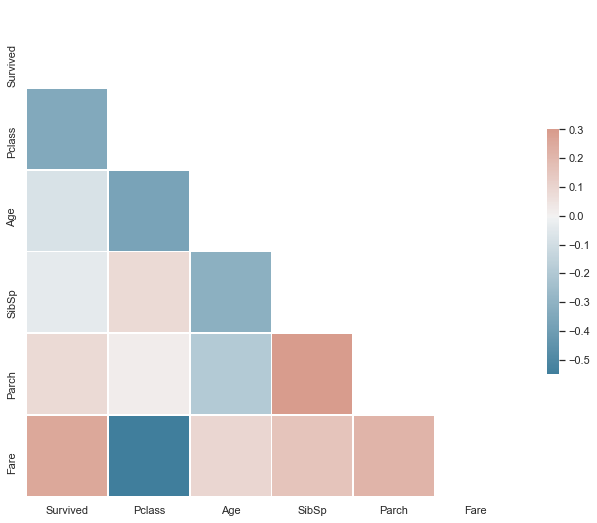

In [13]:
# 4. Correlation between integer variables - correlation matrix

sns.set_theme(style="white")

# Generate a large random dataset

# Compute the correlation matrix
corr = data[['Survived','Pclass','Age','SibSp','Parch','Fare']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [14]:
# General takeways from the correlation matrix:

# TARGET: Positive correlations: Fare | Negative correlations: Pclass

# FEATURES: High correlations between themselfs: Fare-Pclass, SibSp-Parch

# Probably drop the Fare and Parch


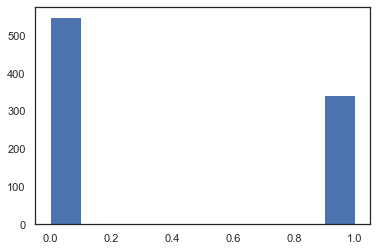

In [15]:
# 5. Data Balance

plt.hist(data['Survived'])
plt.show()

# is a bit imbalanced towards the 'not survived side'

In [16]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [17]:
data.groupby('Sex').agg({'Survived':'sum'})

,Survived
Sex,
female,233
male,109


In [18]:
# 6. Check for Nulls

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [45]:
# DATA CLEANING AND TRANSFORMATION:

# 1. Drop columns that are no use for the algorihm (Fare, Parch, Ticket, Cabin, SibSp)
# 2. Hot-encode the categorical features
# 3. Turning Sex to Boolean
# 4. Get a new feature: titleholder
# 5. Dealing with the nulls from Age and Embarked

In [20]:
# 1. Drop columns that are no use for the algorihm (Fare, Parch, Ticket, Cabin)

data.drop(columns=['Fare', 'Parch', 'Ticket', 'Cabin','SibSp'], inplace=True)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,S


In [21]:
# 2. Hot-encode the categorical features

data_dummied = pd.get_dummies(data, columns=['Embarked'])
data_dummied.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,1


In [31]:
# 3. Turning Sex to Boolean

def sex(row):
    if row == 'male':
        return 0
    else:
        return 1
    
data_dummied['Sex'] = data_dummied['Sex'].apply(sex)

In [32]:
# 4. Get a new feature: titleholder

import re

def titleholder(row):
    return re.findall(", .+\.", row)[0].replace(',','').split()[0]

data_dummied['title'] = data_dummied['Name'].apply(titleholder)

titles = ['Mr.','Mrs.','Master.','Miss.']

def title_holder(row):
    if row in titles:
        return 0
    else:
        return 1

data_dummied['title_holder?'] = data_dummied['title'].apply(title_holder)

data_cleaned = data_dummied.drop(columns=['Name','title'])


In [33]:
data_cleaned.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked_C,Embarked_Q,Embarked_S,title_holder?
0,1,0,3,0,22.0,0,0,1,0
1,2,1,1,1,38.0,1,0,0,0
2,3,1,3,1,26.0,0,0,1,0
3,4,1,1,1,35.0,0,0,1,0
4,5,0,3,0,35.0,0,0,1,0


In [34]:
# 5. Dealing with the nulls from Age and Embarked

data_cleaned[data_cleaned['Age'].isnull()]



,PassengerId,Survived,Pclass,Sex,Age,Embarked_C,Embarked_Q,Embarked_S,title_holder?
5,6,0,3,0,NaN,0,1,0,0
17,18,1,2,0,NaN,0,0,1,0
19,20,1,3,1,NaN,1,0,0,0
26,27,0,3,0,NaN,1,0,0,0
28,29,1,3,1,NaN,0,1,0,0
...,...,...,...,...,...,...,...,...,...
859,860,0,3,0,NaN,1,0,0,0
863,864,0,3,1,NaN,0,0,1,0
868,869,0,3,0,NaN,0,0,1,0
878,879,0,3,0,NaN,0,0,1,0


In [35]:
# As we cannot assume a age, lets just leave the mean (29) for the ones that are null.

data_cleaned["Age"].fillna(29, inplace = True)

In [36]:
# With that, we got no nulls left to deal.

data_cleaned.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
title_holder?    0
dtype: int64

In [37]:
# DATA PRE-PROCESSING

# 1. Sampling

In [38]:
# 1. Sampling

from sklearn.model_selection import train_test_split

X = data_cleaned.drop(columns=['Survived','PassengerId'])

y = data_cleaned['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0, test_size = 0.05)

In [39]:
# MACHINE LEARNING

# 1. Decision Trees
# 2. Hyperparameter Tuning
# 3. Evaluating best options

In [40]:
# 1. Decision Trees

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth = 3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [41]:
# test perfomance with normal data
print("test data accuracy was ",model.score(X_test,y_test))
# training data performance with oversampled data
print("train data accuracy was ",model.score(X_train,y_train))

test data accuracy was  0.8444444444444444
train data accuracy was  0.8238770685579196


In [42]:
# 2. Hyperparameter Tuning

max_depth = range(1,30)
test = []
train = []

for depth in max_depth:
    model = DecisionTreeClassifier(max_depth= depth)
    model.fit(X_train, y_train)
    test.append(model.score(X_test,y_test))
    train.append(model.score(X_train,y_train))

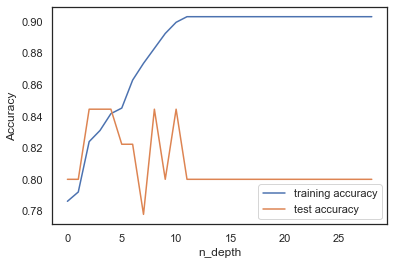

In [43]:
import matplotlib.pyplot as plt
plt.plot( train, label="training accuracy")
plt.plot( test, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_depth")
plt.legend()

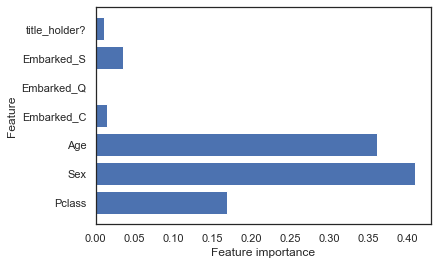

In [44]:
def plot_feature_importances_titanic(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances_titanic(model)

In [47]:
# RESULTS

# 1. Loading the new data
# 2. Cleaning and processing the test set
# 3. Getting the predictions

In [56]:
# 1. Loading the new data

test = pd.read_csv('C:\\Users\\DELL\\Kaggle\\Challenges\\titanic\\test.csv')

In [57]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [58]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [59]:
# 2. Cleaning and processing the test set

test.drop(columns=['Fare', 'Parch', 'Ticket', 'Cabin','SibSp'], inplace=True)

test.head()

,PassengerId,Pclass,Name,Sex,Age,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,S


In [60]:
test_dummied = pd.get_dummies(test, columns=['Embarked'])
test_dummied.head()

,PassengerId,Pclass,Name,Sex,Age,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",male,34.5,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,0,0,1


In [61]:
import re

def titleholder(row):
    return re.findall(", .+\.", row)[0].replace(',','').split()[0]

test_dummied['title'] = test_dummied['Name'].apply(titleholder)

titles = ['Mr.','Mrs.','Master.','Miss.']

def title_holder(row):
    if row in titles:
        return 0
    else:
        return 1

test_dummied['title_holder?'] = test_dummied['title'].apply(title_holder)

test_cleaned = test_dummied.drop(columns=['Name','title'])

In [62]:
test_cleaned["Age"].fillna(29, inplace = True)

In [63]:
test_cleaned['Sex'] = test_cleaned['Sex'].apply(sex)

In [64]:
test_cleaned.head()

,PassengerId,Pclass,Sex,Age,Embarked_C,Embarked_Q,Embarked_S,title_holder?
0,892,3,0,34.5,0,1,0,0
1,893,3,1,47.0,0,0,1,0
2,894,2,0,62.0,0,1,0,0
3,895,3,0,27.0,0,0,1,0
4,896,3,1,22.0,0,0,1,0


In [66]:
# 3. Predictions

pred = model.predict(test_cleaned.drop(columns='PassengerId'))

In [69]:
delivery = pd.concat((test_cleaned['PassengerId'],pd.Series(pred)), axis=1)

In [72]:
delivery = delivery.rename(columns={0:'Survived'})

In [74]:
delivery.to_csv('submission.csv')